In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('/content/test_project.png',2)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

titles = ['ORIGINAL IMAGE','BINARY IMAGE','BINARY_INV']
images = [img, thresh1, thresh2]

for i in range(3):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()
print(img)
print(thresh2)
print(thresh1)

print(img.shape)

for row in thresh2:
  for col in row:
    print(thresh2[row][col])


In [24]:
import cv2

im = cv2.imread('/content/drive/MyDrive/chest_ct_scan_Data/train/normal/10.png')

In [26]:
th, im_th = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)

print(th)
# 128.0

cv2.imwrite('/content/opencv.jpg', im_th)
print(im_th.shape)
print(im_th)
"""for row in im_th:
  for col in row:
    for k in col:
      if k!=0:
        print(im_th[row][k])"""

128.0
(251, 371, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


'for row in im_th:\n  for col in row:\n    for k in col:\n      if k!=0:\n        print(im_th[row][k])'

In [ ]:
th, im_th_tz = cv2.threshold(im, 128, 255, cv2.THRESH_TOZERO)

print(th)
# 128.0

cv2.imwrite('/content/opencv_th_tz.jpg', im_th_tz)

128.0


True

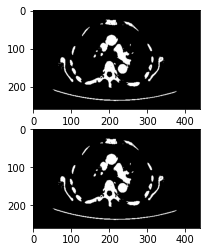

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/opencv_th.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

In [ ]:
import cv2
import numpy as np

# load image
img = cv2.imread("/content/opencv_th.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# write result to disk
cv2.imwrite("hebrew_text_division.jpg", divide)
cv2.imwrite("hebrew_text_division_threshold.jpg", thresh)
cv2.imwrite("hebrew_text_division_morph.jpg", morph)

# display it
cv2.imshow("gray", gray)
cv2.imshow("divide", divide)
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

In [28]:
import cv2
import numpy as np

# load numpy array
images = ("/content/drive/MyDrive/chest_ct_scan_Data/train/normal/10.png");

# do the lung thing
counter = 0;
for img in images:
    # convert to uint8
    img *= 255;
    inty = img.astype(np.uint8);

    # dilate
    kernel = np.ones((3,3), np.uint8);
    mask = cv2.dilate(inty, kernel, iterations = 1);

    # invert
    mask = cv2.bitwise_not(mask);

    # contours # OpenCV 3.4, this returns (contours, _) on OpenCV 2 and 4
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);

    # find biggest
    biggest = None;
    big_size = -1;
    for con in contours:
        area = cv2.contourArea(con);
        if area > big_size:
            big_size = area;
            biggest = con;

    # draw fill mask
    mask2 = np.zeros_like(mask);
    cv2.drawContours(mask2, [biggest], -1, (255), -1);

    # combine
    lungs_mask = cv2.bitwise_and(inty, mask2);

    # show
    cv2.imshow("Lungs", inty);
    cv2.imshow("Mask", lungs_mask);
    cv2.waitKey(30);

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
